# COGS 189 Final Project

This project aims to analyze emotions to a social media feed using BCI</br>
Group Members: </br>
Stephen Gelinas (A15816513) </br>
Aditya Tomar (A17162996) </br>
Shay Samat (A16816403)</br>
Rolando Restua (A16017564)</br>
Kevin Wong (A16687709)

## Data Loading

We will first load and inspect the raw EEG data we collected with OpenBCI

In [ ]:
import pandas as pd
from IPython.display import Image
import numpy as np
import mne
import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/eeg.txt')
df.head()

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386,...,12.0,48.0,229.0,48.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.792
1,1.0,20007.337035,7455.603177,2753.377289,2629.906253,1095.973086,1520.455065,9324.119607,7072.449574,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.809
2,2.0,20010.935665,7457.324261,2753.645510,2630.867378,1089.558135,1516.051771,9328.612307,7063.553579,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.812
3,3.0,20021.329227,7457.458372,2753.176123,2630.599157,1083.947847,1517.772855,9331.875662,7054.121143,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.815
4,4.0,20028.168860,7457.123096,2753.042013,2630.152122,1082.249115,1522.489074,9335.429589,7034.541015,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.818


There appears to be no missing values from the data collection process in the raw EEG data

In [ ]:
df.isna().sum()

Sample Index              0
 EXG Channel 0            0
 EXG Channel 1            0
 EXG Channel 2            0
 EXG Channel 3            0
 EXG Channel 4            0
 EXG Channel 5            0
 EXG Channel 6            0
 EXG Channel 7            0
 Accel Channel 0          0
 Accel Channel 1          0
 Accel Channel 2          0
 Other                    0
 Other.1                  0
 Other.2                  0
 Other.3                  0
 Other.4                  0
 Other.5                  0
 Other.6                  0
 Analog Channel 0         0
 Analog Channel 1         0
 Analog Channel 2         0
 Timestamp                0
 Other.7                  0
 Timestamp (Formatted)    0
dtype: int64

The image below illustrates locations of the 8 selected channels for the data collection process (including GND and REF) 

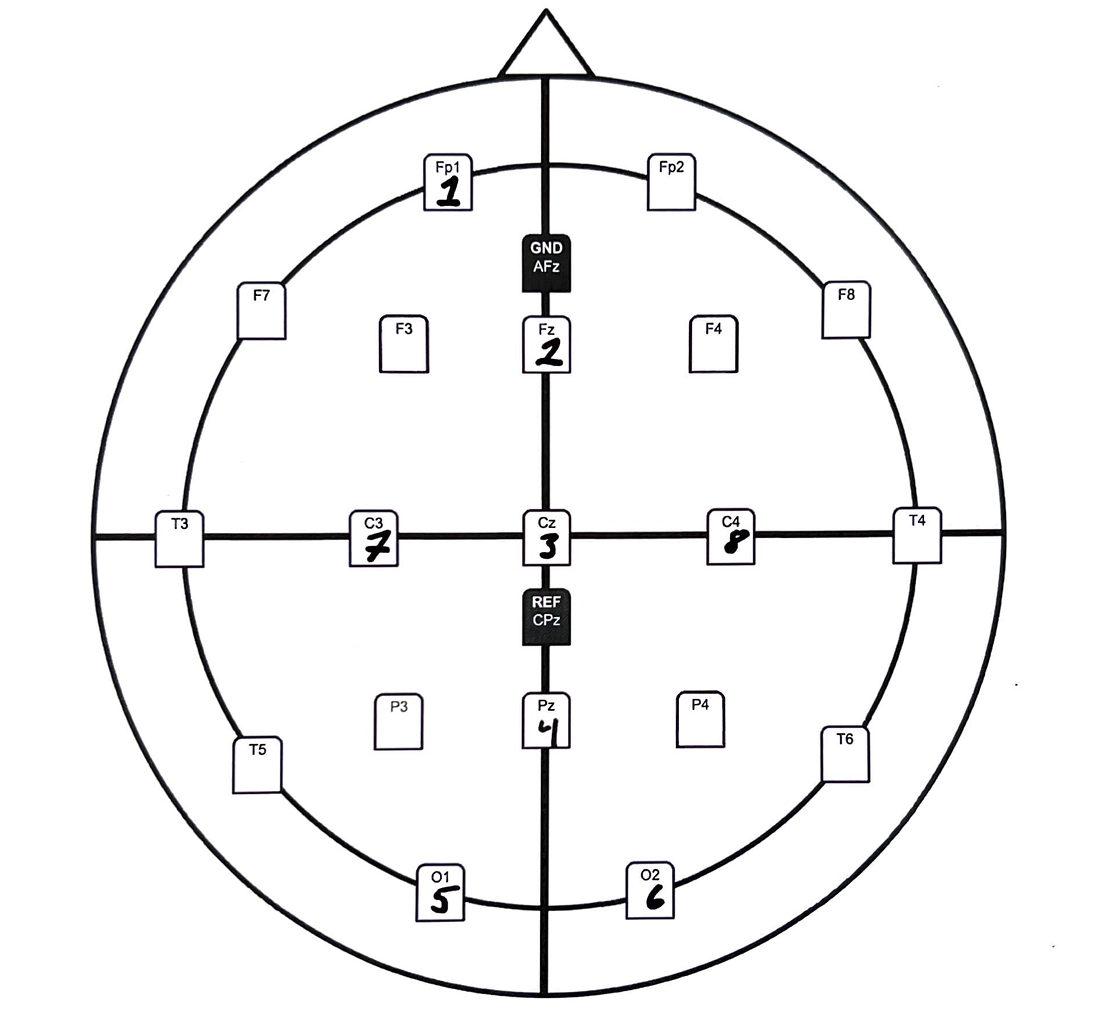

In [ ]:
Image("data/channels.png", width=400)

## Data Cleaning/Preprocessing

Here, we are just removing the channels where we didn't record any data and irrelevant toward our analysis

In [ ]:

dropped = [' Other', ' Other.7', ' Analog Channel 0', ' Analog Channel 1', ' Analog Channel 2']
df_cleaned = df.drop(columns=dropped)

Below is a function that will help plot the raw data for each channel that we recorded

In [ ]:
def plot_raw_data(df):
    df = df.iloc[1: , :]
    exg = [i for i in df.columns if 'EXG' in i]
    plt.rcParams["figure.figsize"] = (40,20)
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=8, ncols=1, sharex=True)
    df[exg[0]].plot(ax=ax1)
    ax1.set_title('Fp1')
    df[exg[1]].plot(ax=ax2)
    ax2.set_title('Fz')
    df[exg[2]].plot(ax=ax3)
    ax3.set_title('Cz')
    df[exg[3]].plot(ax=ax4)
    ax4.set_title('Pz')
    df[exg[4]].plot(ax=ax5)
    ax5.set_title('O1')
    df[exg[5]].plot(ax=ax6)
    ax6.set_title('O2')
    df[exg[6]].plot(ax=ax7)
    ax7.set_title('C3')
    df[exg[7]].plot(ax=ax8)
    ax8.set_title('C4')
    ax8.set_xlabel('Timestamp')

    plt.show()


Find the sampling frequency and defining channel names, and other pre-processing steps

Creating RawArray with float64 data, n_channels=8, n_times=248554
    Range : 0 ... 248553 =      0.000 ...   993.292 secs
Ready.


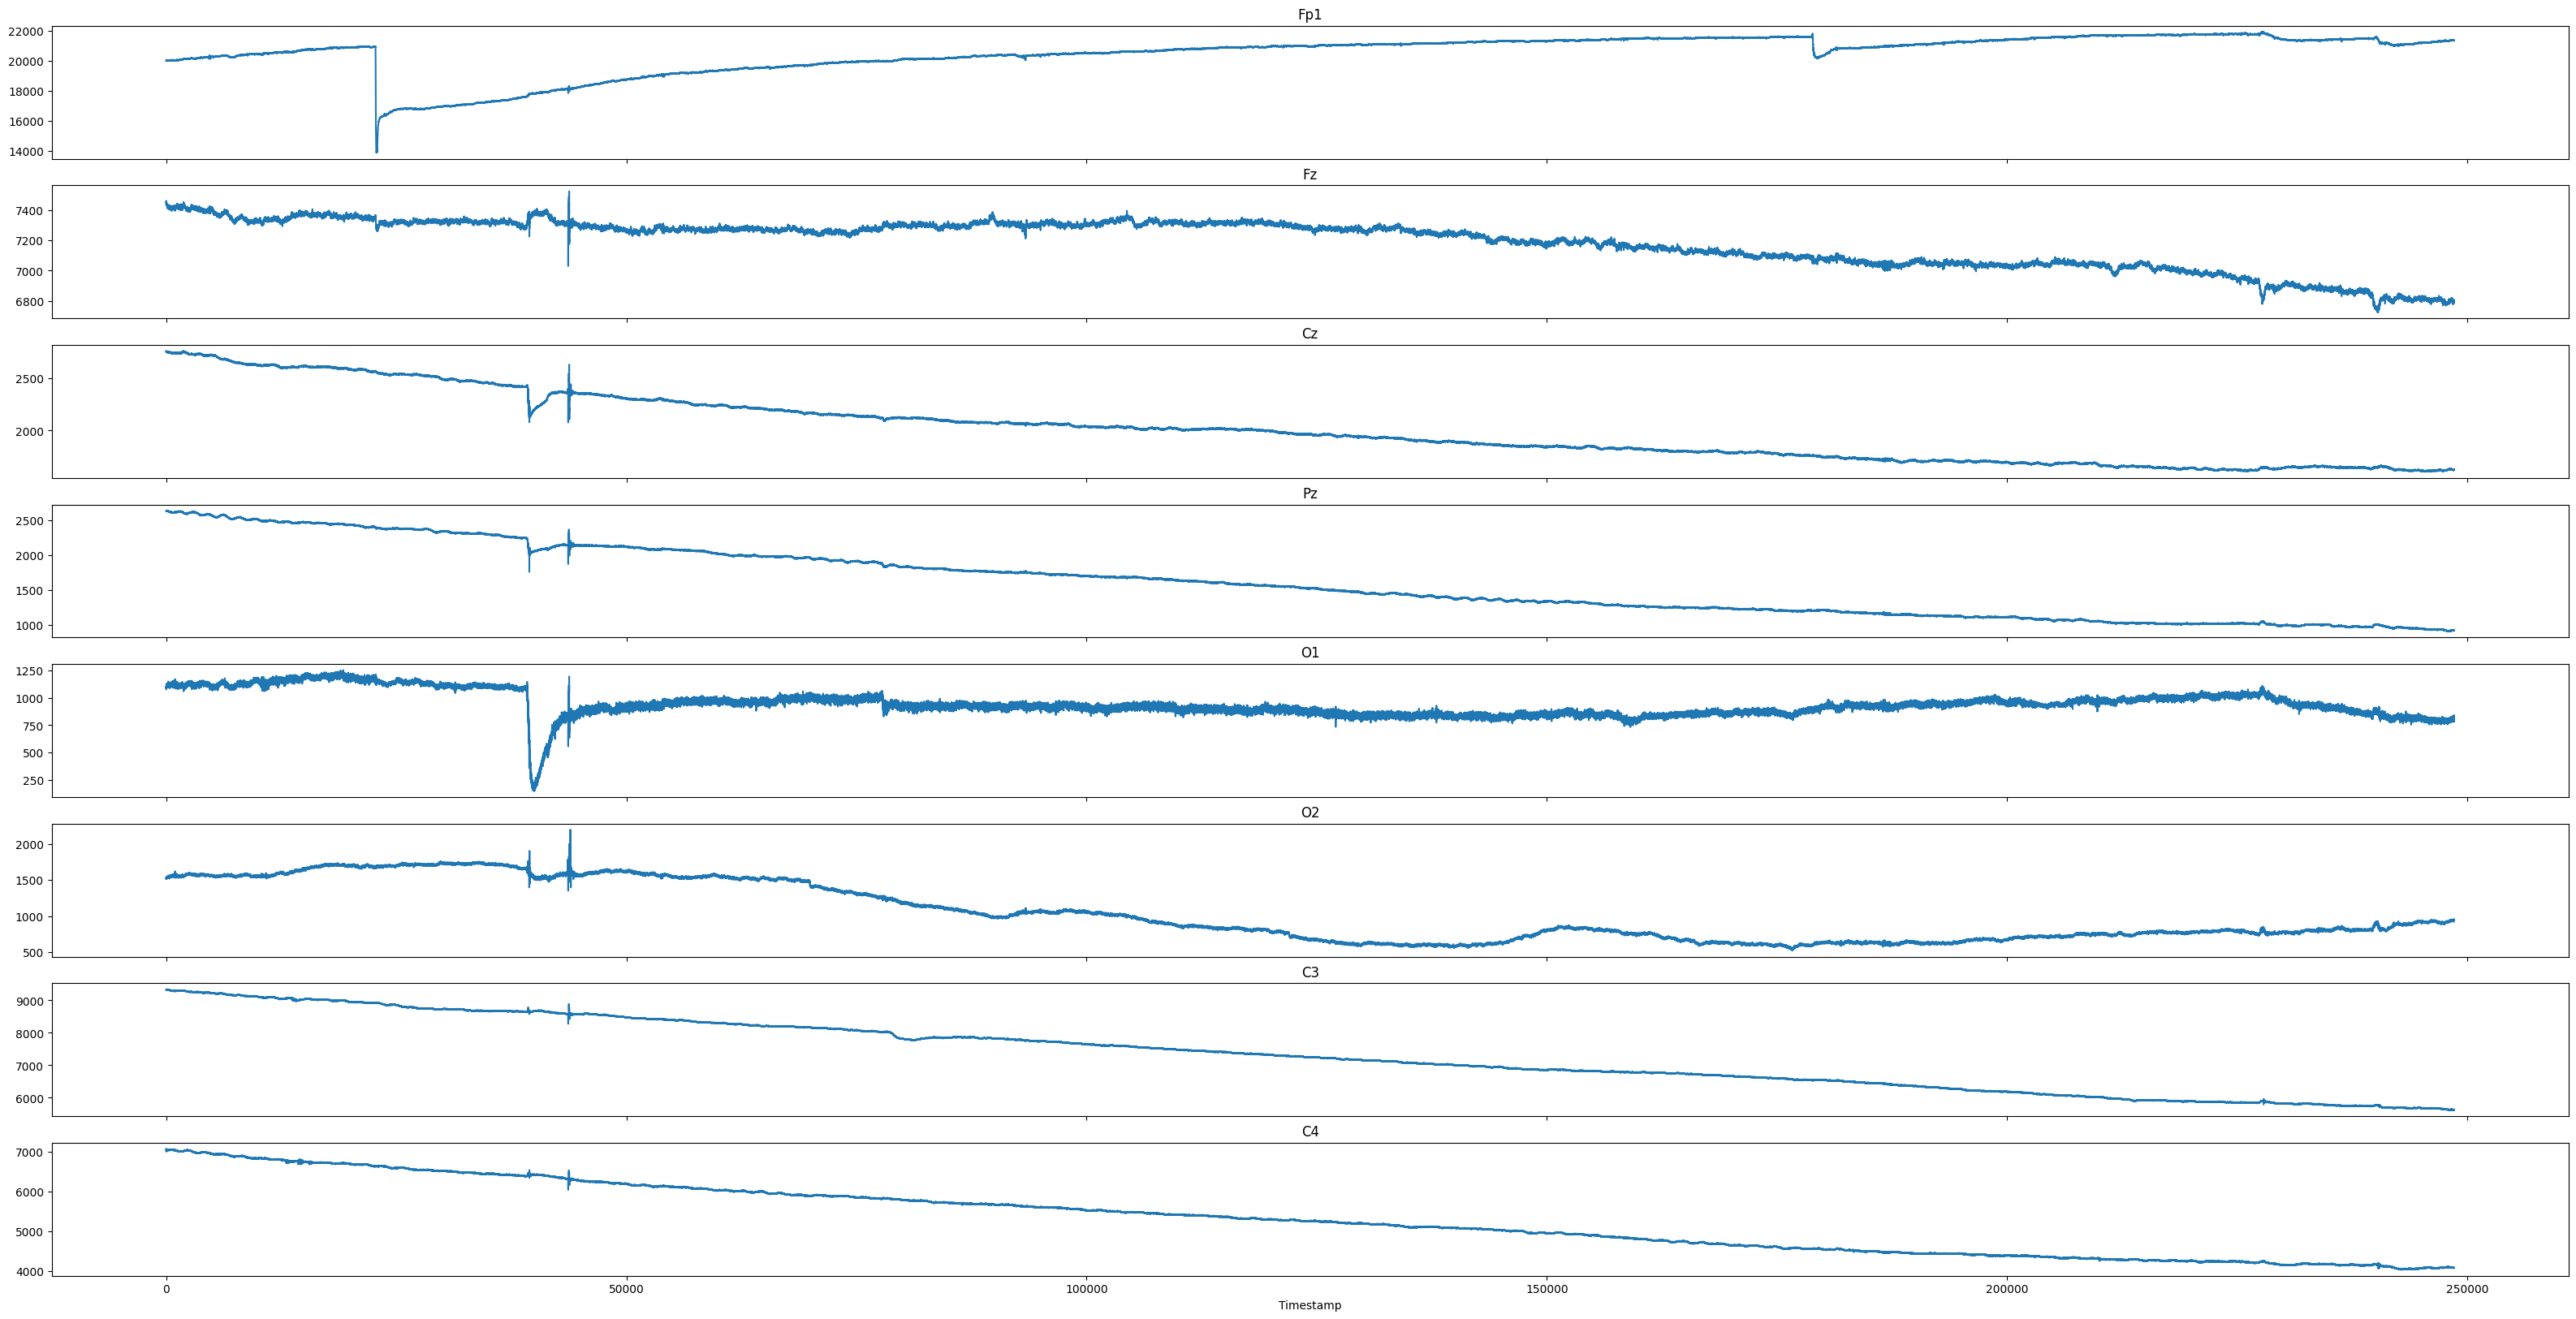

In [ ]:
sfreq = 1 / np.mean(np.diff(df[' Timestamp']))


ch_names = df.columns[1:9].tolist()
ch_types = ['eeg'] * len(ch_names)
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
data = df[ch_names].values.T.astype(np.float32)
raw = mne.io.RawArray(data, info)
plot_raw_data(df)

We created a NumPy array for plotting

In [ ]:
df_cleaned = raw.get_data()

We are plotting the channels for each timepoint

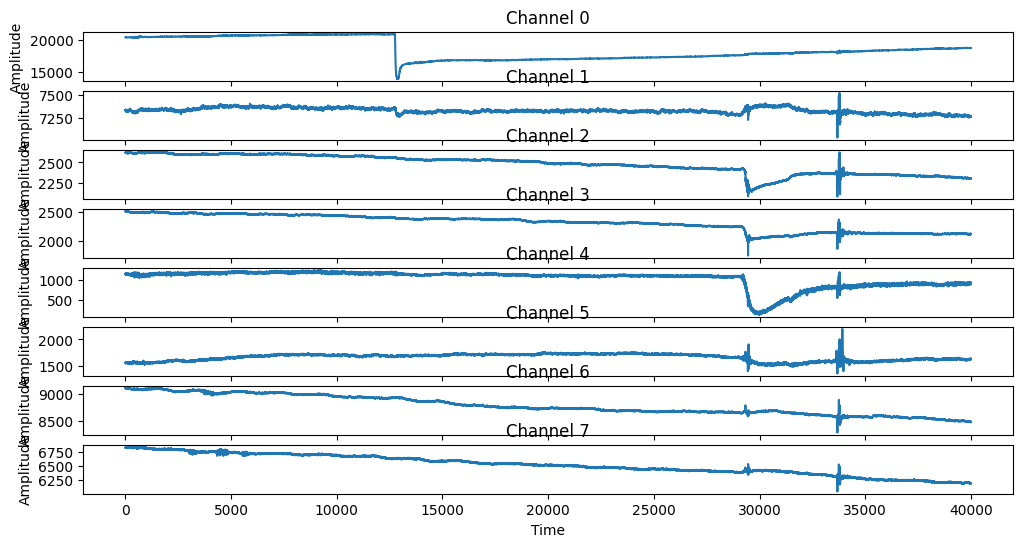

In [ ]:
data = df_cleaned

channels = [0, 1, 2, 3, 4, 5, 6, 7]
time_points = range(10000, 50000)

fig, ax = plt.subplots(8,figsize=(12, 6))
for i in channels:
    ax[i].plot(data[[i]][:, time_points].T)
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Amplitude')
    ax[i].set_title('Channel '+str(i))
plt.show()

This uses the plot_psd function on the raw data from mne to display the power spectral density

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.184 (s)


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_51967/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


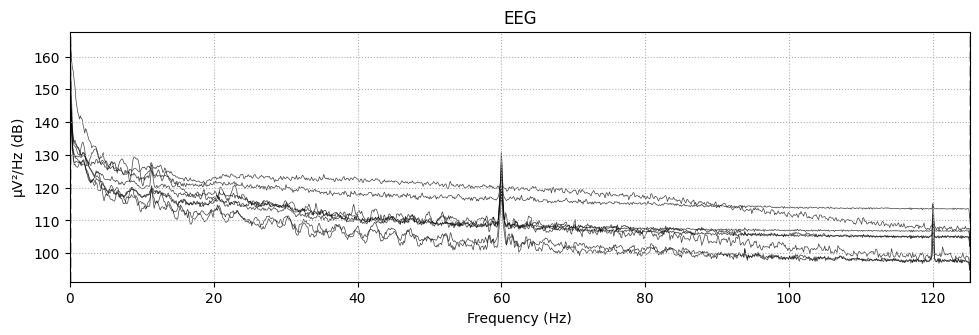

In [ ]:
raw.plot_psd()

Here we used the acceleration channels to remove any segments with muscle movement

In [ ]:
accelerometer_data = df[[' Accel Channel 0', ' Accel Channel 1', ' Accel Channel 2']].values.T.astype(np.float32)
acceleration = np.linalg.norm(accelerometer_data, axis=0)

threshold = np.percentile(acceleration, 95)
bad_segments = np.where(acceleration > threshold)[0]
raw.annotations.append(bad_segments, [1] * len(bad_segments), 'bad')

raw.interpolate_bads(reset_bads=True)

/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_51967/1867526347.py:8: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(reset_bads=True)


<RawArray | 8 x 248554 (993.3 s), ~15.2 MB, data loaded>

We are renaming the channels for aethestics and for further steps

In [ ]:
channels = ['Fp1', 'Fz', 'Cz', 'Pz', 'O1', 'O2', 'C3', 'C4'] 

We applied a high and low pass filter to remove eye movements, muscle movements, and other artifacts that might affect our data. 

In [ ]:
high_pass = raw.filter(l_freq=1.0, h_freq=None)
high_pass = high_pass.get_data().T
high_pass = pd.DataFrame(high_pass)
high_pass.columns = ch_names
high_pass.head()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 827 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7
0,2.017053e-12,2.497558e-12,5.802026e-13,9.617862e-13,1.207923e-13,1.865175e-13,2.957190e-12,-7.935874e-13
1,1.984664e+04,7.395934e+03,2.731332e+03,2.608728e+03,1.087038e+03,1.508091e+03,9.249204e+03,7.015909e+03
2,1.968955e+04,7.337992e+03,2.709556e+03,2.588513e+03,1.071687e+03,1.491324e+03,9.178787e+03,6.950477e+03
3,1.953929e+04,7.278471e+03,2.687046e+03,2.567072e+03,1.057142e+03,1.480684e+03,9.107153e+03,6.884518e+03
4,1.938550e+04,7.218495e+03,2.664877e+03,2.545457e+03,1.046511e+03,1.473043e+03,9.035826e+03,6.808425e+03


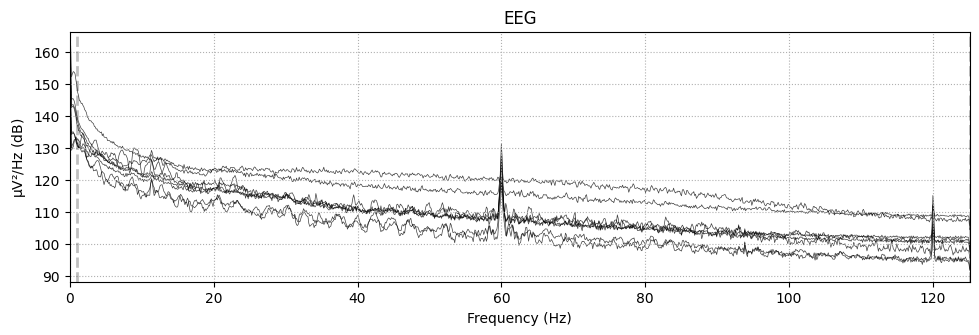

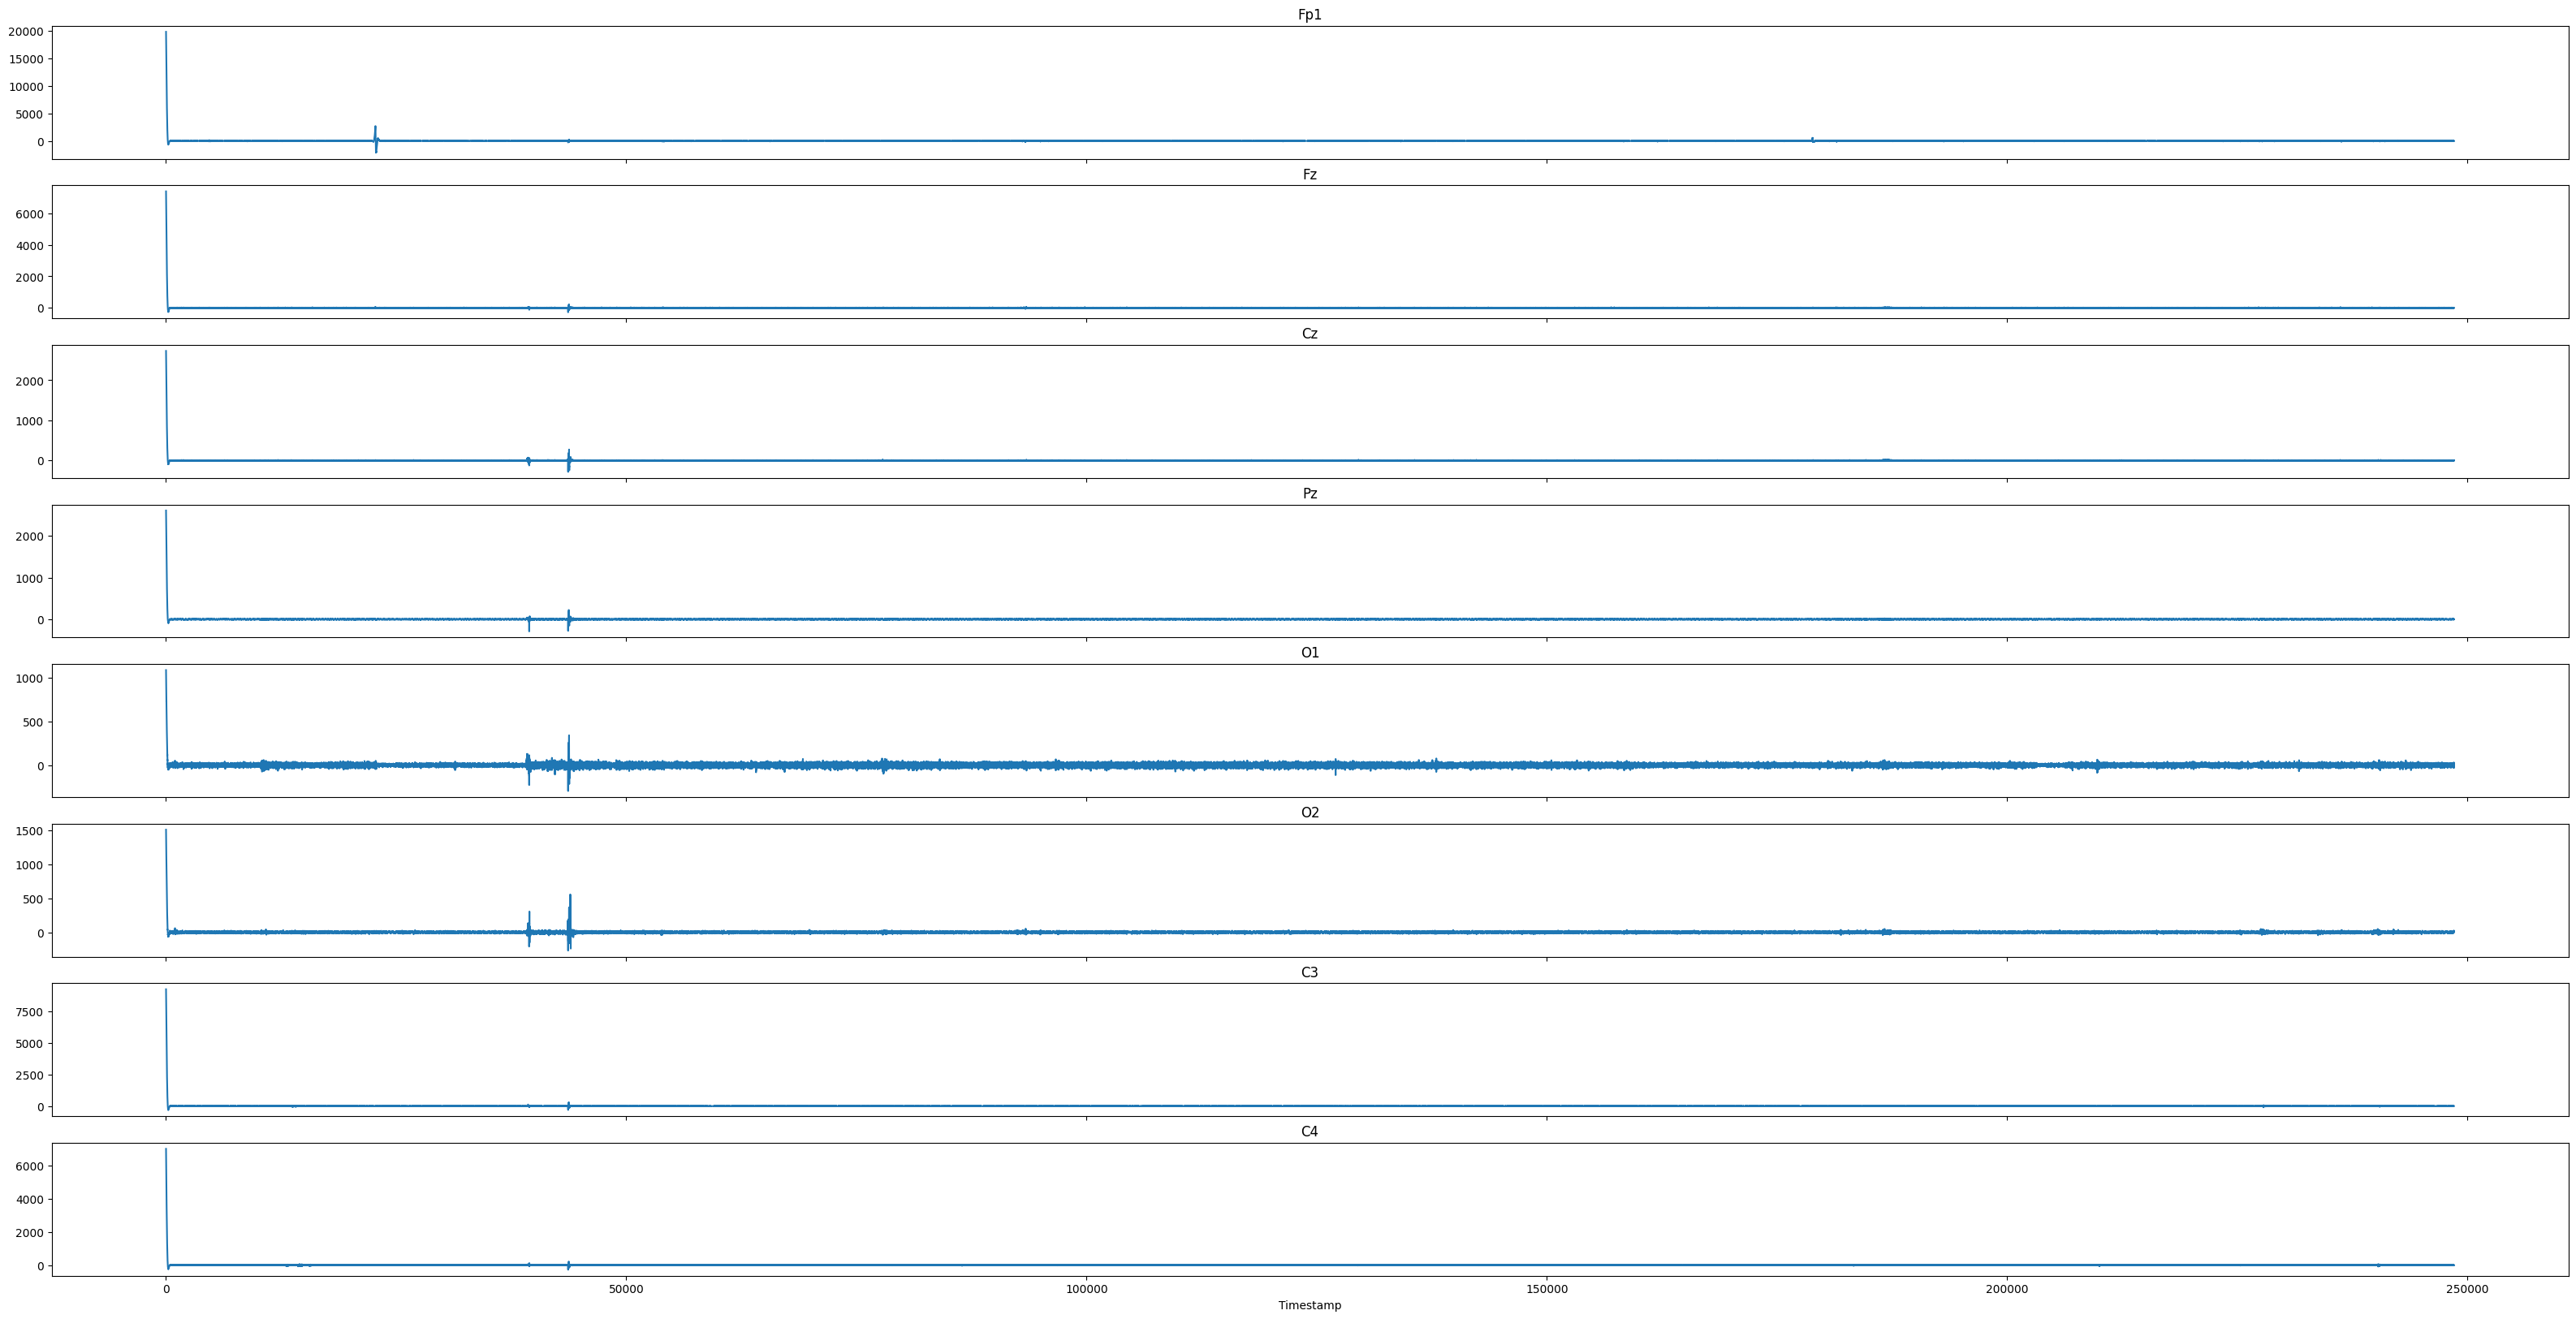

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 26350 of 248554 (10.60%) samples to NaN, retaining 222204 (89.40%) samples.
Effective window size : 8.184 (s)


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_51967/935657465.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


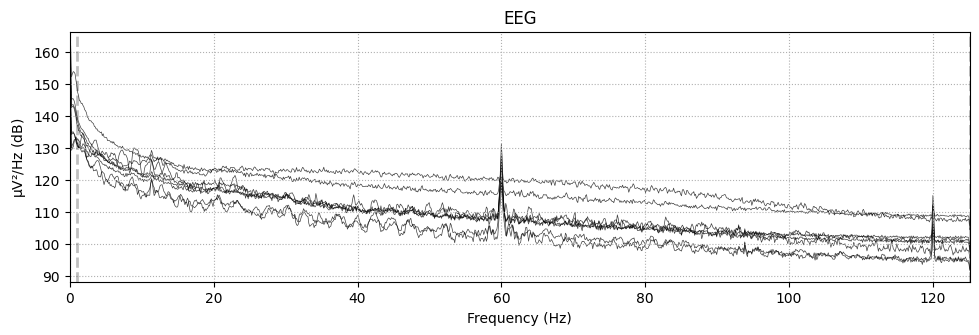

In [ ]:
plot_raw_data(high_pass)
raw.plot_psd()

This is the low pass filter

In [ ]:
low_pass = raw.filter(l_freq= None, h_freq=40.0)
low_pass = low_pass.get_data().T
low_pass = pd.DataFrame(low_pass)
low_pass.columns = ch_names
low_pass.head()

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 83 samples (0.332 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished


,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7
0,1.023182e-12,1.904255e-12,2.131628e-13,7.815970e-13,1.101341e-13,2.131628e-14,1.421085e-12,-4.263256e-13
1,1.277413e+04,4.759431e+03,1.757598e+03,1.678772e+03,6.947898e+02,9.684846e+02,5.953889e+03,4.515378e+03
2,2.080509e+04,7.751574e+03,2.862320e+03,2.734027e+03,1.130849e+03,1.577552e+03,9.697223e+03,7.345307e+03
3,2.257899e+04,8.412367e+03,3.105862e+03,2.966853e+03,1.226193e+03,1.712617e+03,1.052445e+04,7.954711e+03
4,2.038315e+04,7.593977e+03,2.803175e+03,2.678121e+03,1.106669e+03,1.547167e+03,9.501552e+03,7.161431e+03


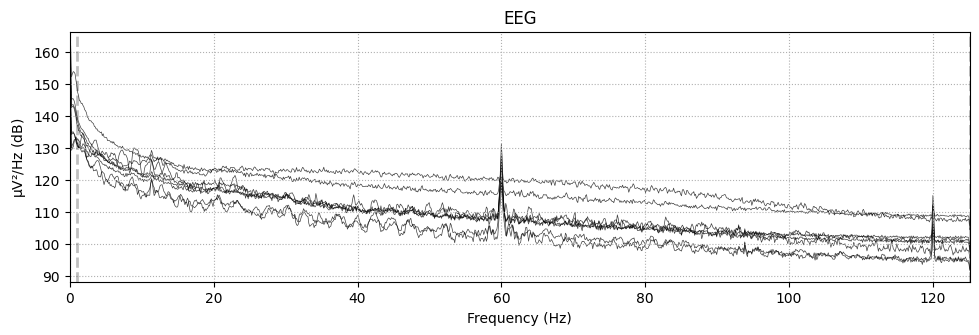

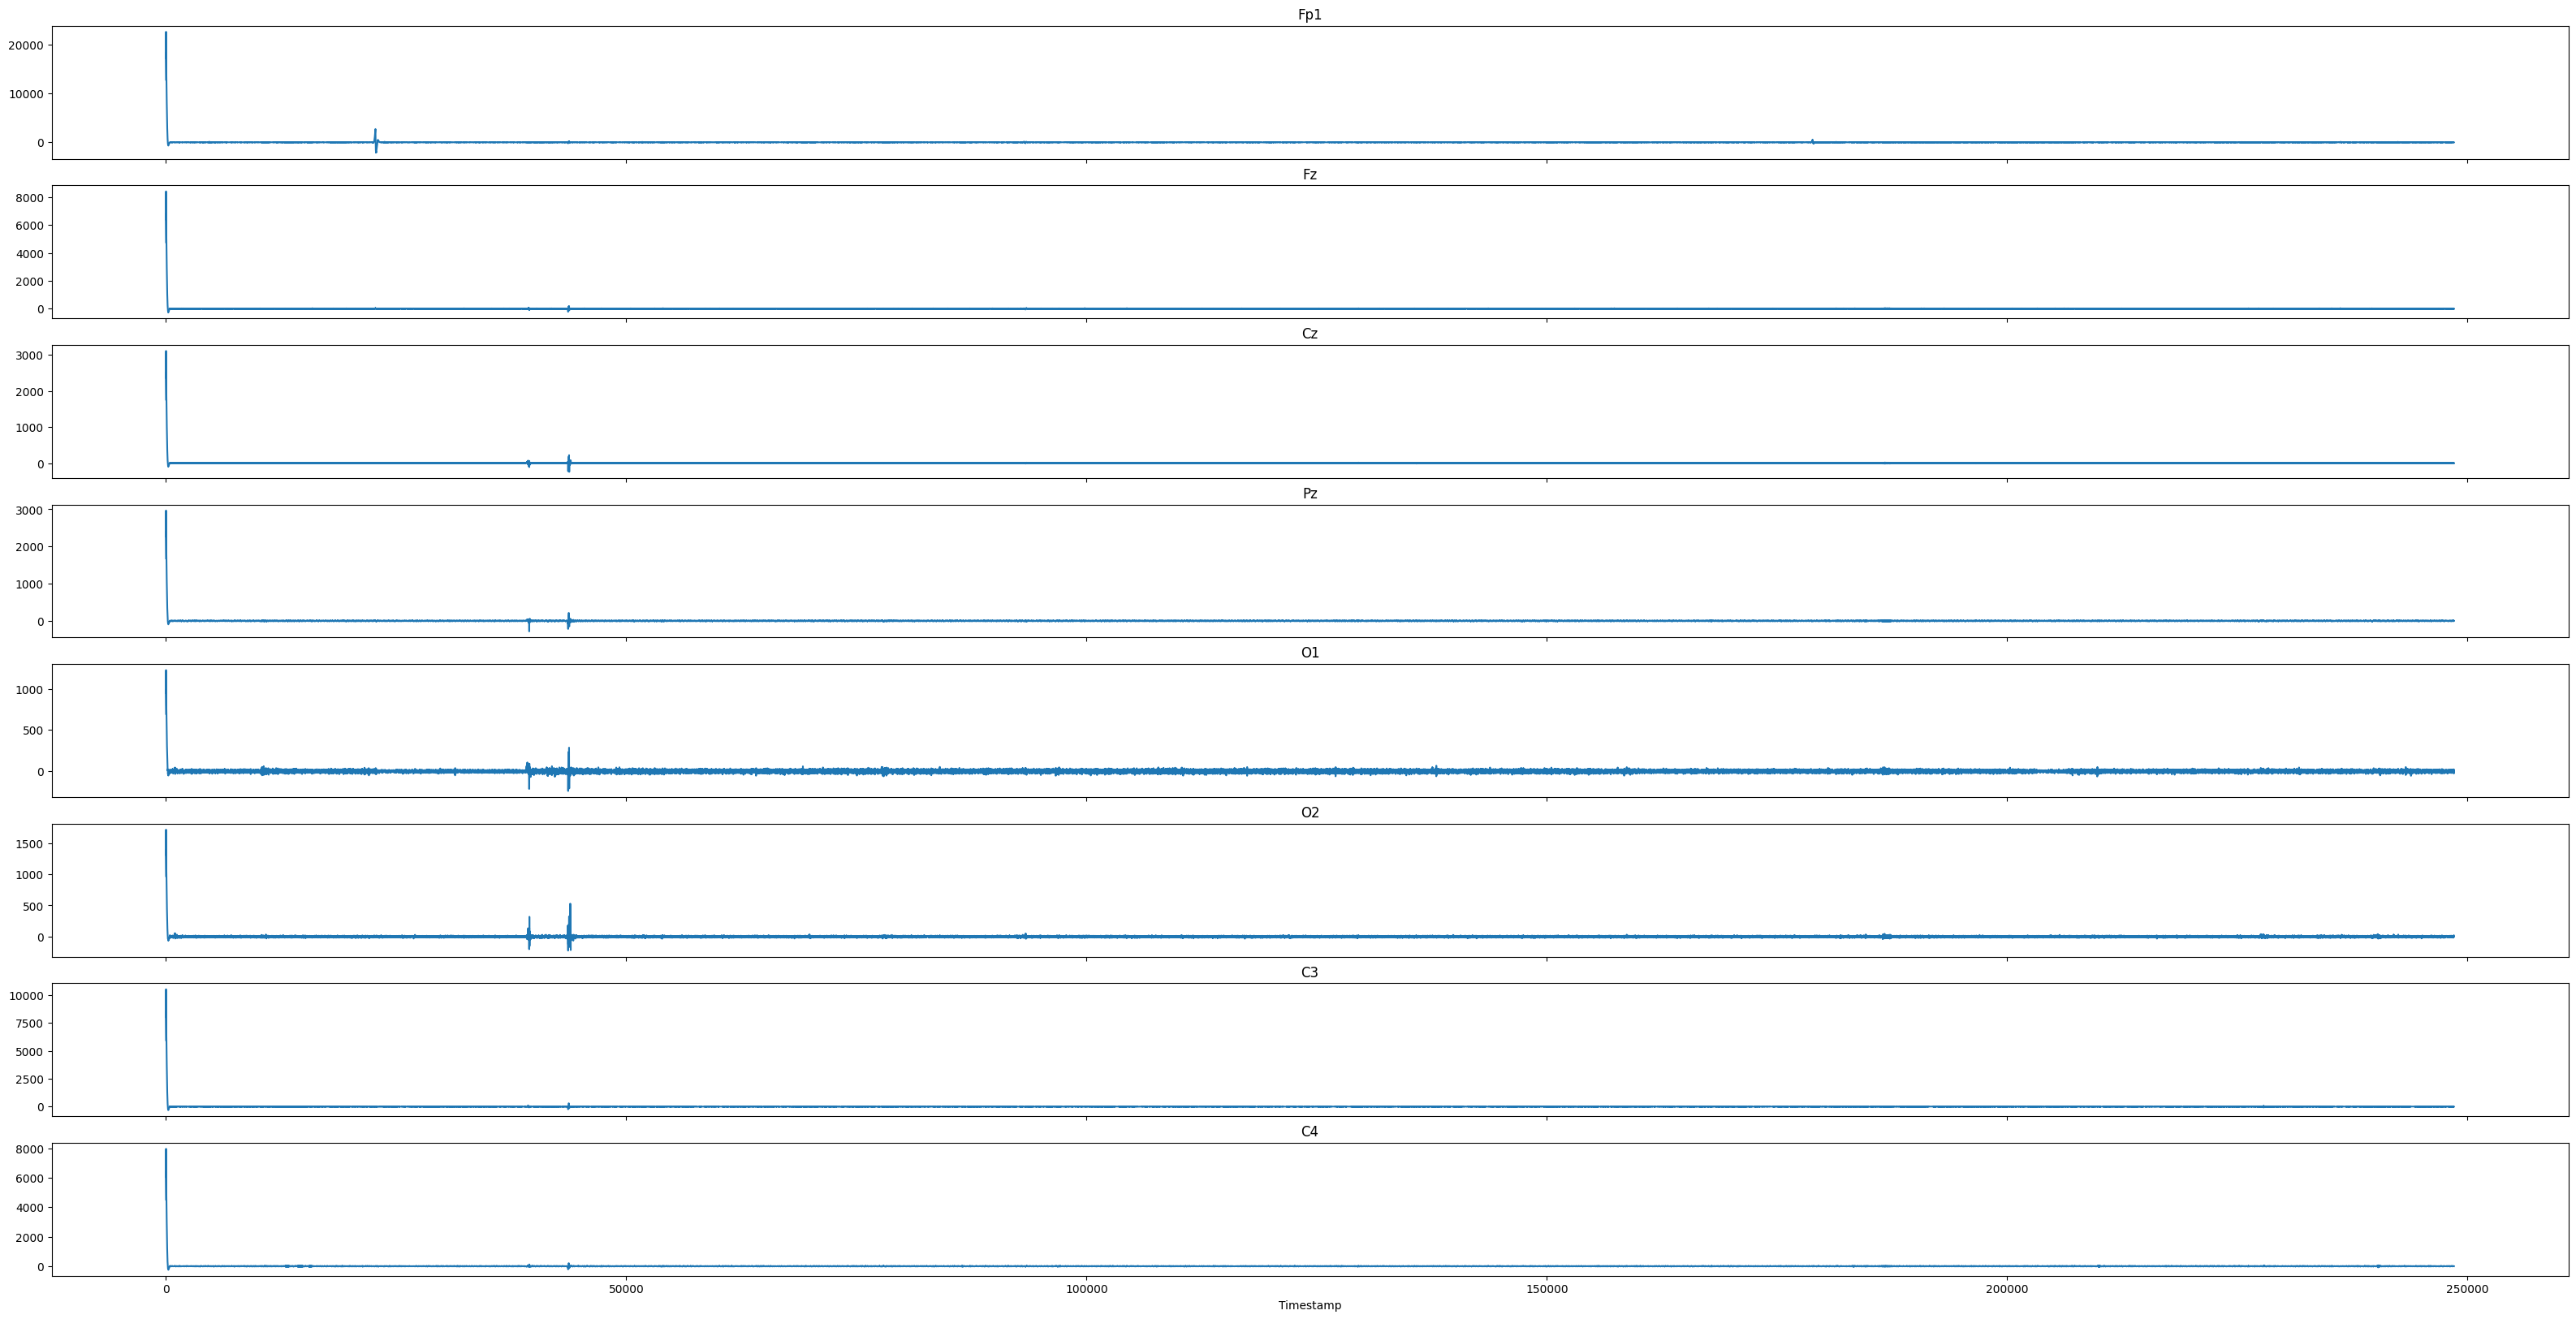

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 26350 of 248554 (10.60%) samples to NaN, retaining 222204 (89.40%) samples.
Effective window size : 8.184 (s)


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_51967/1227879636.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


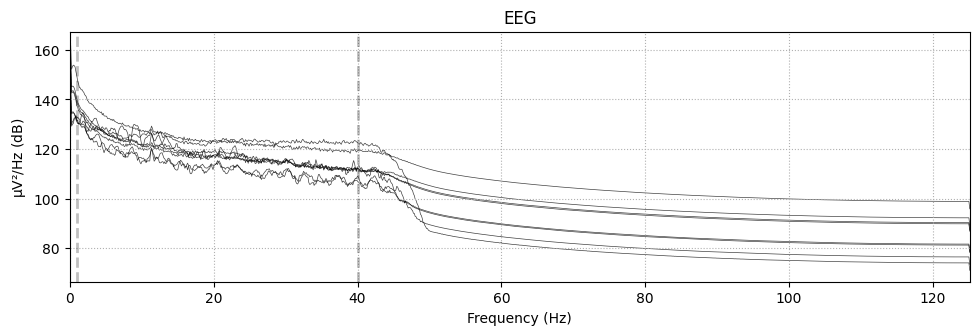

In [ ]:
plot_raw_data(low_pass)
raw.plot_psd()

We chose to epoch our data in 10 second intervals to match our testing procedure where each social media post had a duration of 10 seconds. We also created an event dictionary for labeling samples. We then created a new dataframe called epochs_array for t-tests.

In [ ]:
epoch_length = 10

n_samples_per_epoch = int(epoch_length * raw.info['sfreq'])

epoch_starts = range(0, raw.n_times - n_samples_per_epoch + 1, n_samples_per_epoch)

event_dict = {'happy': 1, 'sad': 2, 'neutral': 3}

epoch_ids = ['sad', 'neutral', 'neutral', 'neutral', 'happy', 'sad', 'happy', 'happy', 'sad', 'happy',
             'neutral', 'sad', 'sad', 'neutral', 'happy', 'sad', 'sad', 'neutral', 'happy', 'neutral',
             'sad', 'happy', 'neutral', 'neutral', 'happy', 'sad', 'sad', 'neutral', 'happy', 'neutral',
             'sad', 'sad', 'neutral', 'sad', 'neutral', 'happy', 'neutral', 'neutral', 'happy', 'happy',
             'sad', 'sad', 'sad', 'happy', 'sad', 'happy', 'sad', 'happy', 'sad', 'sad', 'neutral',
             'happy', 'neutral', 'happy', 'happy', 'happy', 'happy', 'happy', 'sad', 'neutral', 'happy',
             'neutral', 'sad', 'neutral', 'sad', 'neutral', 'sad', 'neutral', 'happy', 'sad', 'sad',
             'happy', 'happy', 'neutral', 'happy', 'happy', 'neutral', 'neutral', 'happy', 'neutral',
             'sad', 'neutral', 'happy', 'happy', 'sad', 'sad', 'neutral', 'neutral', 'sad', 'neutral']

event_codes = np.array([event_dict[id] for id in epoch_ids])
event_id = {'happy': 1, 'sad': 2, 'neutral': 3}

events = np.column_stack((range(len(event_codes)), np.zeros(len(event_codes)), event_codes)).astype(int)

epochs_data = [raw.get_data(start=start, stop=start + n_samples_per_epoch) for start in epoch_starts]
epochs_array = mne.EpochsArray(data=epochs_data[9:], info=raw.info, events=events, event_id=event_id)
epochs_array.rename_channels(dict(zip(epochs_array.ch_names, channels)))

print(f"Number of epochs: {len(epochs_array)}")


Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Number of epochs: 90


This shows the number of epochs for each event id

In [ ]:
happy_epochs = epochs_array['happy']
sad_epochs = epochs_array['sad']
neutral_epochs = epochs_array['neutral']

print(f"Number of happy epochs: {len(happy_epochs)}")
print(f"Number of sad epochs: {len(sad_epochs)}")
print(f"Number of neutral epochs: {len(neutral_epochs)}")

Number of happy epochs: 30
Number of sad epochs: 30
Number of neutral epochs: 30


This plots the epochs across all channels and event ID

In [ ]:
nrows = len(channels)
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

colors = {'happy': 'blue', 'sad': 'red', 'neutral': 'green'}

epoch_ids = ['happy', 'sad', 'neutral']

for i, channel in enumerate(channels):

    happy_data = happy_epochs.get_data()[:, i, :]
    sad_data = sad_epochs.get_data()[:, i, :]
    neutral_data = neutral_epochs.get_data()[:, i, :]
    

    for j, epoch_data in enumerate([happy_data, sad_data, neutral_data]):
        axs[i, j].plot(epoch_data.T, color=colors[epoch_ids[j]])
        axs[i, j].set_title(f'{channel} - {epoch_ids[j]}')
        axs[i, j].set_xlabel('Time')
        axs[i, j].set_ylabel('Amplitude')


fig.legend(handles=colors.values(), labels=colors.keys(), loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3)


fig.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.90)


/Users/shaysamat/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support 'blue' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Users/shaysamat/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support 'red' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Users/shaysamat/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support 'green' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


Here we are calculating the event-related potentials for each event id and plotting them

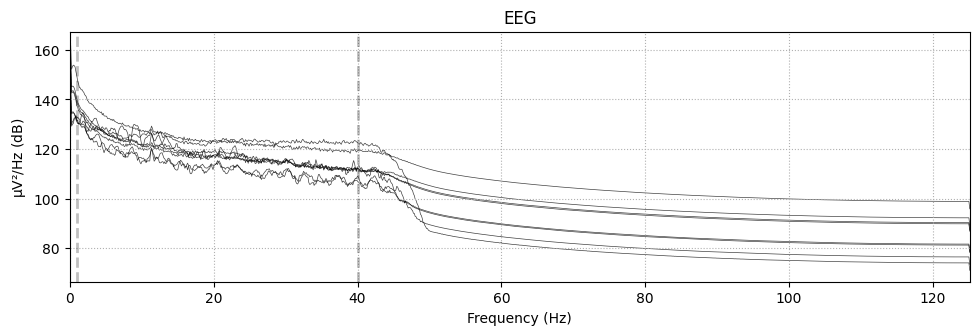

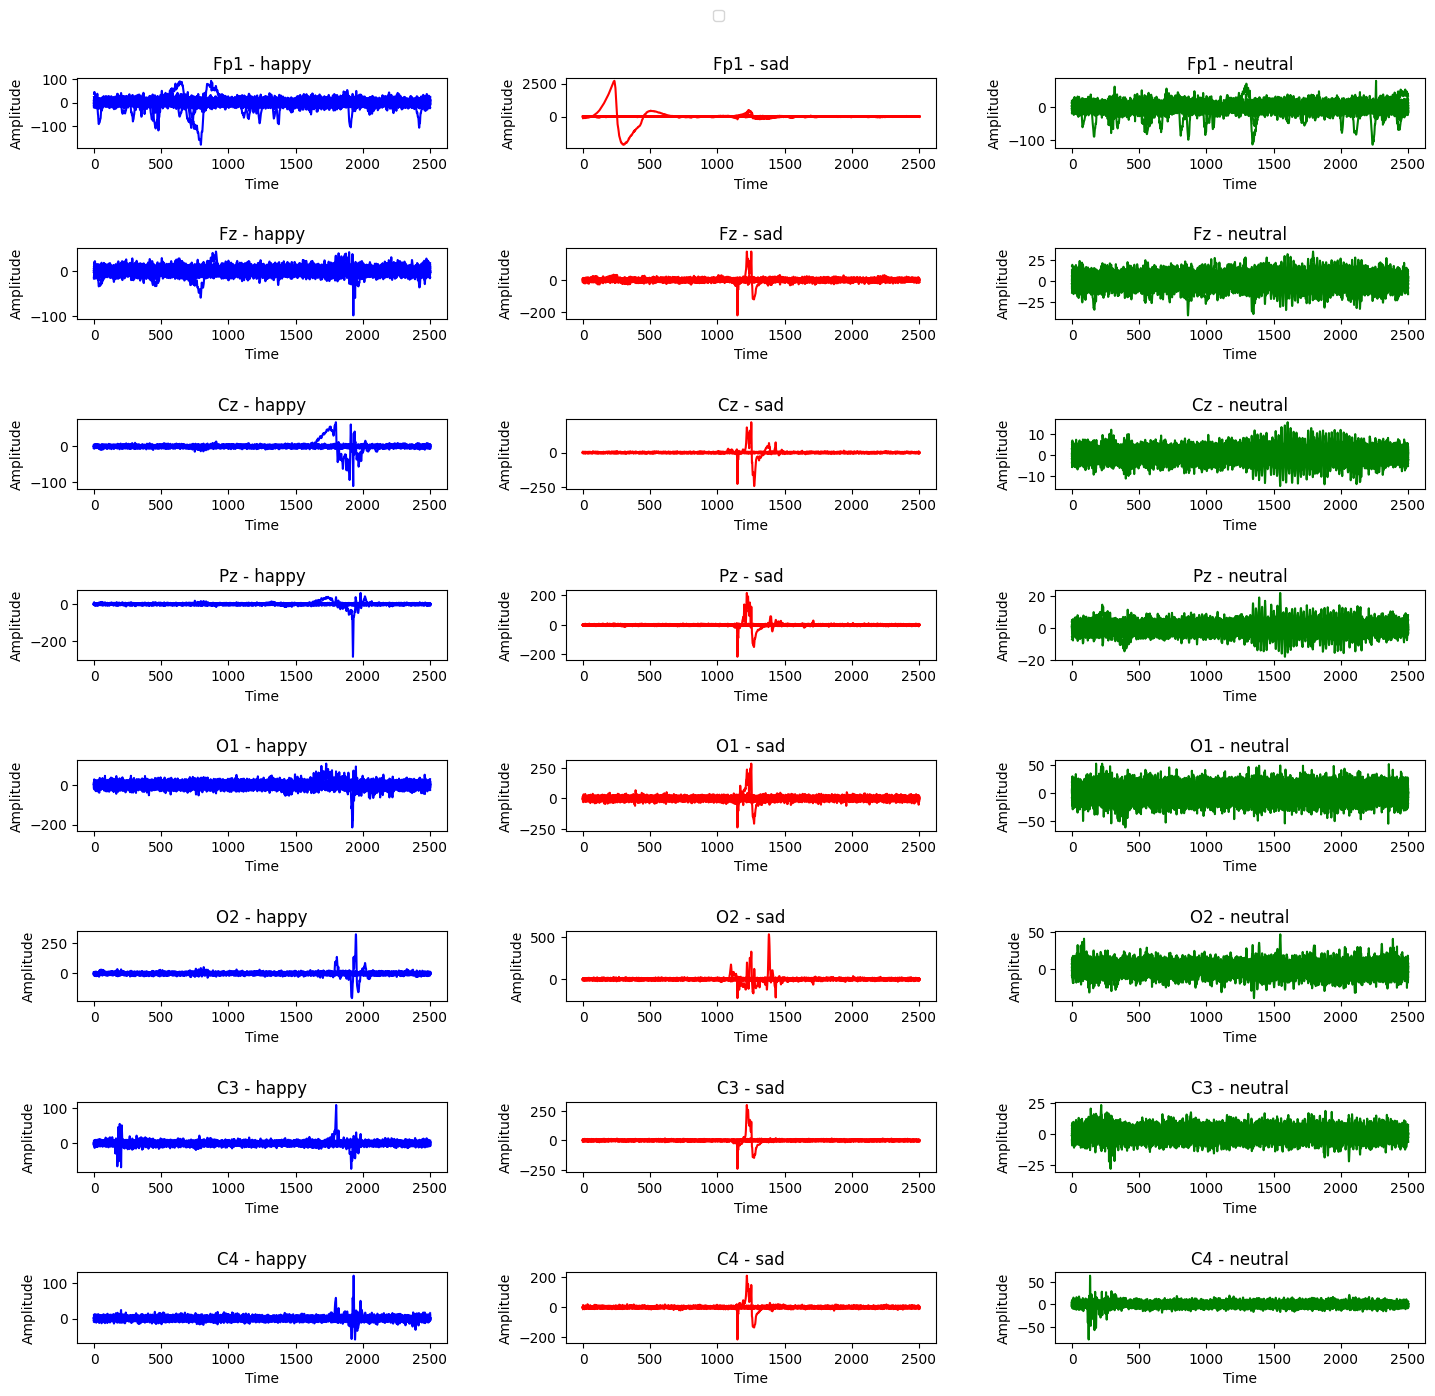

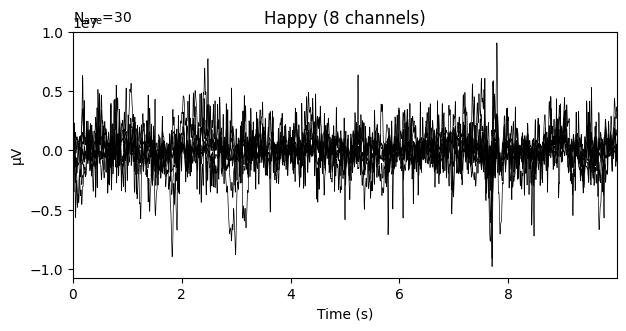

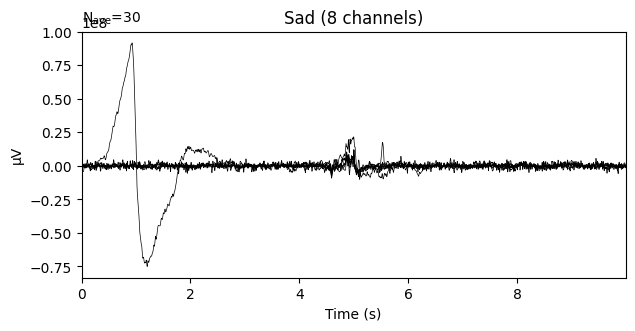

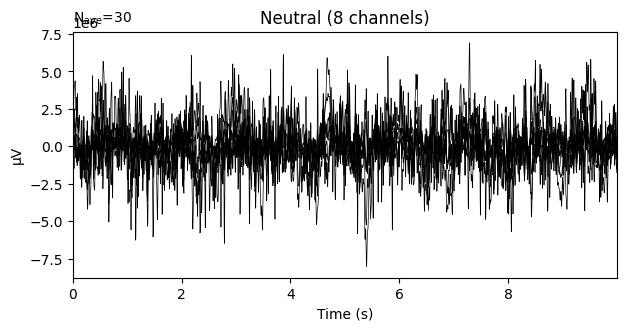

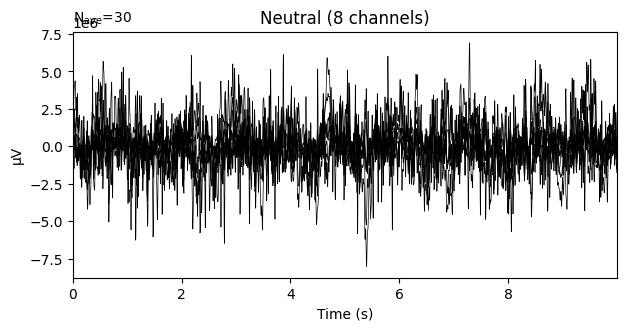

In [ ]:
erp = epochs_array['happy'].average()
erp2 = epochs_array['sad'].average()
erp3 = epochs_array['neutral'].average()

colors = {'happy': 'blue', 'sad': 'red', 'neutral': 'green'}

erp.plot(titles = 'Happy')
erp2.plot(titles = 'Sad')
erp3.plot(titles = 'Neutral')

From the labels we created earlier, we passed those into the t-test function

In [ ]:
def ttest_1samp_no_p(X, sigma=0.0, method='relative'):
    var = np.var(X, axis=0)
    if sigma > 0.0:
        limit = sigma * np.max(var) if method == 'relative' else sigma
        var += limit
    t_vals = np.mean(X, axis=0) / np.sqrt(var / X.shape[0])
    df = X.shape[0] - 1
    return t_vals, df

happy_epochs_data = happy_epochs.get_data()
sad_epochs_data = sad_epochs.get_data()
neutral_epochs_data = neutral_epochs.get_data()

n_epochs = happy_epochs_data.shape[0]

happy_t, happy_df = ttest_1samp_no_p(happy_epochs_data, n_epochs)

sad_t, sad_df = ttest_1samp_no_p(sad_epochs_data, n_epochs)

neutral_t, neutral_df = ttest_1samp_no_p(neutral_epochs_data, n_epochs)

print(f"Happy t-value: {happy_t}")
print(f"Sad t-value: {sad_t}")
print(f"Neutral t-value: {neutral_t}")

Happy t-value: [[-0.01746432 -0.02523735 -0.0228716  ...  0.05768594  0.063403
   0.05767426]
 [-0.02029896 -0.01666358 -0.00716323 ...  0.02275811  0.02395923
   0.02577114]
 [-0.00592244 -0.00418577  0.00011499 ...  0.00244193  0.00286135
   0.00396254]
 ...
 [-0.01505797 -0.01453992 -0.0190516  ... -0.01014644 -0.00035841
   0.00558178]
 [-0.00642706 -0.00676307 -0.00644933 ... -0.00037288 -0.00157079
   0.00151558]
 [-0.00984372 -0.00508802  0.00451987 ...  0.02747242  0.02529461
   0.02183613]]
Sad t-value: [[-7.59729968e-03 -8.66355569e-03 -9.40726599e-03 ...  3.22959997e-03
   2.19304279e-03  5.41253626e-04]
 [-4.69738741e-04 -4.72240093e-04 -4.43224467e-04 ...  1.47318465e-03
  -6.04132039e-04 -2.82859830e-03]
 [ 8.84214981e-04  9.02646102e-04  8.04798039e-04 ...  3.62946672e-04
  -1.64271962e-04 -7.78463745e-04]
 ...
 [-2.87211217e-03 -3.44135965e-03 -3.84041105e-03 ... -2.16552507e-03
  -2.36051091e-03 -1.95311610e-03]
 [ 9.73596385e-04  1.20557339e-03  8.15982932e-04 ... -6.

Here we calulated the average t-test to get a better understanding of our data and compare among the emotions

In [ ]:
happy_avg_t = np.mean(happy_t)
sad_avg_t = np.mean(sad_t)
neutral_avg_t = np.mean(neutral_t)

print(f"Happy average t-value: {happy_avg_t}")
print(f"Sad average t-value: {sad_avg_t}")
print(f"Neutral average t-value: {neutral_avg_t}")

Happy average t-value: 1.3297172189502741e-05
Sad average t-value: 1.4646397650610365e-05
Neutral average t-value: 0.00031854863778533153
